# MNIST 숫자 손글씨 분류

Tensorflow 버전 검토

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model
print(tf.__version__)

2.8.2


MNIST 데이터를 읽고 그래프로 살펴보기

11501568/11490434 [==============================] - 0s 0us/step


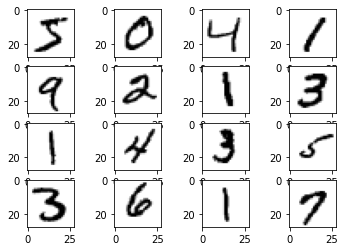

In [2]:
mnist = datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

import matplotlib.pyplot as plt
for col1 in range(16):
  plt.subplot(4,4,col1+1)
  plt.imshow(train_x[col1].reshape(28,28), cmap=plt.cm.binary)
plt.show()

데이터 확인

In [3]:
digit =  train_x[0]
print(type(digit))

print("digit :", digit.shape)
print("train images :", train_x.shape)
print("test  images :", test_x.shape)

<class 'numpy.ndarray'>
digit : (28, 28)
train images : (60000, 28, 28)
test  images : (10000, 28, 28)


완전연결 신경망의 작성

In [4]:
model1 = models.Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


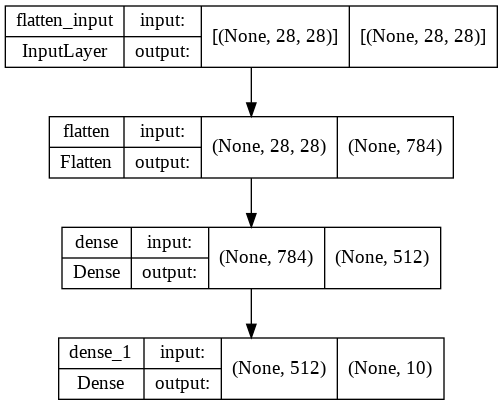

In [5]:
plot_model(model1, to_file="model1_mnist.png", show_shapes=True)

In [6]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model1.fit(train_x, train_y, epochs=12, batch_size=256, validation_split=0.25)
#hist = model1.fit(train_x, train_y, epochs=12, batch_size=256, validation_data=(test_x, test_y))

Epoch 1/12
176/176 [==============================] - 4s 18ms/step - loss: 0.3690 - accuracy: 0.8980 - val_loss: 0.2072 - val_accuracy: 0.9403
Epoch 2/12
176/176 [==============================] - 3s 16ms/step - loss: 0.1611 - accuracy: 0.9538 - val_loss: 0.1491 - val_accuracy: 0.9579
Epoch 3/12
176/176 [==============================] - 3s 16ms/step - loss: 0.1092 - accuracy: 0.9692 - val_loss: 0.1226 - val_accuracy: 0.9651
Epoch 4/12
176/176 [==============================] - 3s 15ms/step - loss: 0.0807 - accuracy: 0.9776 - val_loss: 0.1070 - val_accuracy: 0.9675
Epoch 5/12
176/176 [==============================] - 3s 15ms/step - loss: 0.0617 - accuracy: 0.9829 - val_loss: 0.0992 - val_accuracy: 0.9705
Epoch 6/12
176/176 [==============================] - 3s 15ms/step - loss: 0.0483 - accuracy: 0.9870 - val_loss: 0.0919 - val_accuracy: 0.9723
Epoch 7/12
176/176 [==============================] - 3s 15ms/step - loss: 0.0389 - accuracy: 0.9898 - val_loss: 0.0844 - val_accuracy: 0.9746

In [7]:
sc = model1.evaluate(test_x, test_y)
print("accuracy : ", sc[1], "  loss : ", sc[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.0658 - accuracy: 0.9795
accuracy :  0.9794999957084656   loss :  0.06583180278539658


결과를 그래프로 표시


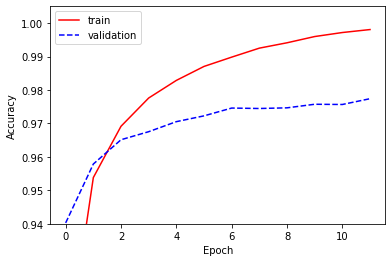

In [8]:
plt.plot(hist.history['accuracy'], 'r-')
plt.plot(hist.history['val_accuracy'], 'b--')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.94,1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()